## 목표
- 500명의 키와 몸무게 비만도 라벨을 이용해 비만도 판단하는 모델작성 

In [35]:
import pandas as pd  # 데이터 만들기
import matplotlib.pyplot as plt # 시각화용 matplot 적용
from sklearn.neighbors import KNeighborsClassifier  #KNN 알고리즘
from sklearn.metrics import accuracy_score  # 알고리즘 성적 결과
from matplotlib import rc
rc('font',family="Malgun Gothic")  # 한글적용

In [2]:
data = pd.read_csv("Data/bmi_500.csv", index_col='Label')
data.head()

,Gender,Height,Weight
Label,,,
Obesity,Male,174,96
Normal,Male,189,87
Obesity,Female,185,110
Overweight,Female,195,104
Overweight,Male,149,61


In [3]:
data.loc["Normal"]

,Gender,Height,Weight
Label,,,
Normal,Male,189,87
Normal,Male,195,81
Normal,Male,155,51
Normal,Male,191,79
Normal,Female,172,67
...,...,...,...
Normal,Female,178,65
Normal,Male,167,64
Normal,Female,151,55


In [4]:
data.info()  # 데이터의 정보와 결측치 여부, 컬럼정보등을 통합해서 확인 가능

<class 'pandas.core.frame.DataFrame'>
Index: 500 entries, Obesity to Extreme Obesity
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Gender  500 non-null    object
 1   Height  500 non-null    int64 
 2   Weight  500 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 25.6+ KB


In [5]:
data.describe()  # 기술통계치, 평균, 최대최소값, 4분위 등 확인 가능

,Height,Weight
count,500.000000,500.000000
mean,169.944000,106.000000
std,16.375261,32.382607
min,140.000000,50.000000
25%,156.000000,80.000000
50%,170.500000,106.000000
75%,184.000000,136.000000
max,199.000000,160.000000


#### 남자와 여자를 분리해서 기술통계치 확인

In [6]:
data2 = pd.read_csv("Data/bmi_500.csv", index_col='Gender')
data2.head()

,Height,Weight,Label
Gender,,,
Male,174,96,Obesity
Male,189,87,Normal
Female,185,110,Obesity
Female,195,104,Overweight
Male,149,61,Overweight


In [7]:
female = data2.loc["Female"]
male = data2.loc["Male"]

In [8]:
female.describe()

,Height,Weight
count,255.000000,255.000000
mean,170.227451,105.698039
std,15.711825,32.962025
min,140.000000,50.000000
25%,157.000000,79.000000
50%,170.000000,106.000000
75%,184.000000,135.000000
max,199.000000,160.000000


In [9]:
male.describe()

,Height,Weight
count,245.000000,245.000000
mean,169.648980,106.314286
std,17.065665,31.832734
min,140.000000,50.000000
25%,154.000000,80.000000
50%,171.000000,105.000000
75%,183.000000,137.000000
max,199.000000,160.000000


In [10]:
data[data['Gender'] == "Female"].describe()

,Height,Weight
count,255.000000,255.000000
mean,170.227451,105.698039
std,15.711825,32.962025
min,140.000000,50.000000
25%,157.000000,79.000000
50%,170.000000,106.000000
75%,184.000000,135.000000
max,199.000000,160.000000


In [11]:
data[data['Gender'] == "Male"].describe()

,Height,Weight
count,245.000000,245.000000
mean,169.648980,106.314286
std,17.065665,31.832734
min,140.000000,50.000000
25%,154.000000,80.000000
50%,171.000000,105.000000
75%,183.000000,137.000000
max,199.000000,160.000000


In [17]:
data[data['Gender'] == "Female"].loc["Normal"]

,Gender,Height,Weight
Label,,,
Normal,Female,172,67
Normal,Female,185,81
Normal,Female,168,59
Normal,Female,153,51
Normal,Female,192,90
Normal,Female,165,57
Normal,Female,187,70
Normal,Female,169,54
Normal,Female,184,76


In [18]:
data_n=data.loc["Normal"].copy()  # 복사본만들기
#이걸 하는 이유는 데이터베이스처럼 색으로 들어가면 크기에 따라 에러가 발생할 수 있어서 아예 새로 복사해 준비함
#일종의 색인이 된 데이터를 별도로 저장해서 바로 들어가는 것
data_n[data_n['Gender']=="Female"]

,Gender,Height,Weight
Label,,,
Normal,Female,172,67
Normal,Female,185,81
Normal,Female,168,59
Normal,Female,153,51
Normal,Female,192,90
Normal,Female,165,57
Normal,Female,187,70
Normal,Female,169,54
Normal,Female,184,76


## 정답의 클래스 수 확인

In [21]:
data.index.unique()

Index(['Obesity', 'Normal', 'Overweight', 'Extreme Obesity', 'Weak',
       'Extremely Weak'],
      dtype='object', name='Label')

In [22]:
data.head()

,Gender,Height,Weight
Label,,,
Obesity,Male,174,96
Normal,Male,189,87
Obesity,Female,185,110
Overweight,Female,195,104
Overweight,Male,149,61


In [ ]:
data.index # 행 index
data.columns # 컬럼 명
data.values # 값

In [27]:
data ["Weight(kg)"] = data ["Weight"] * 0.453592

In [28]:
data

,Gender,Height,Weight,Weight(kg)
Label,,,,
Obesity,Male,174,96,43.544832
Normal,Male,189,87,39.462504
Obesity,Female,185,110,49.895120
Overweight,Female,195,104,47.173568
Overweight,Male,149,61,27.669112
...,...,...,...,...
Extreme Obesity,Female,150,153,69.399576
Obesity,Female,184,121,54.884632
Extreme Obesity,Female,141,136,61.688512


## 각 등급별 시각화 - scatter plot(점찍기)

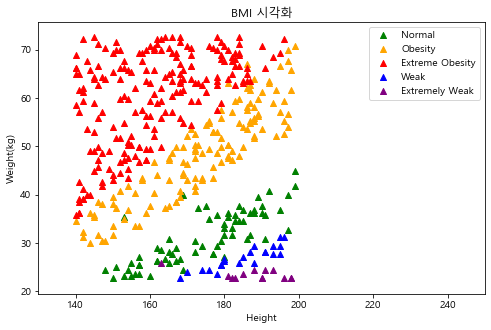

In [55]:
plt.figure(figsize=(8, 5)) # 가로세로 크기비율 설정

normal = data.loc['Normal']
plt.scatter(normal['Height'], normal['Weight(kg)']
           , c='green', marker='^', label = "Normal")

obesity = data.loc['Obesity']
plt.scatter(obesity['Height'], obesity['Weight(kg)']
           , c='orange', marker='^', label = "Obesity")
ex_obesity = data.loc['Extreme Obesity']
plt.scatter(ex_obesity['Height'], ex_obesity['Weight(kg)']
           , c='red', marker='^', label = "Extreme Obesity")

weak = data.loc['Weak']
plt.scatter(weak['Height'], weak['Weight(kg)']
           , c='blue', marker='^', label = "Weak")
ex_weak = data.loc['Extremely Weak']
plt.scatter(ex_weak['Height'], ex_weak['Weight(kg)']
           , c='purple', marker='^', label = "Extremely Weak")


plt.xlabel('Height')
plt.ylabel('Weight(kg)')
plt.title('BMI 시각화')
plt.xlim(130, 250)
plt.legend(loc = 'upper right')
plt.savefig('BMI_scatter.png') # 해당 폴더에 작성그림 저장
plt.show() # 내가 그린 그림 시각화

### 모델학습하기
- 문제와 답으로 분리
- 트레인, 테스트 데이터 분리
- 모델 선정 및 학습
- 모델 평가

In [113]:
X = data.loc[:, 'Height':'Weight(kg)' ]
y = data.index.values  # numpy형태로 추출하기 위해 values 사용

In [110]:
data.loc[:, 'Height':'Weight(kg)' ]
data.index

Index(['Obesity', 'Normal', 'Obesity', 'Overweight', 'Overweight',
       'Overweight', 'Extreme Obesity', 'Extreme Obesity', 'Overweight',
       'Obesity',
       ...
       'Normal', 'Extreme Obesity', 'Extremely Weak', 'Weak',
       'Extreme Obesity', 'Extreme Obesity', 'Obesity', 'Extreme Obesity',
       'Extreme Obesity', 'Extreme Obesity'],
      dtype='object', name='Label', length=500)

In [114]:
X.drop("Weight",axis=1) # 1번
# 삭제할 때 뒤에 axis=1 반드시 적을 것!

,Height,Weight(kg)
Label,,
Obesity,174,43.544832
Normal,189,39.462504
Obesity,185,49.895120
Overweight,195,47.173568
Overweight,149,27.669112
...,...,...
Extreme Obesity,150,69.399576
Obesity,184,54.884632
Extreme Obesity,141,61.688512


In [116]:
X = X.loc[:,["Height","Weight(kg)"]] # 2번
# 특정 행만 선택해서 할 때는 1개만 들어가야하니 반드시 []로 묶어 리스트 형태로 지정

In [117]:
X

,Height,Weight(kg)
Label,,
Obesity,174,43.544832
Normal,189,39.462504
Obesity,185,49.895120
Overweight,195,47.173568
Overweight,149,27.669112
...,...,...
Extreme Obesity,150,69.399576
Obesity,184,54.884632
Extreme Obesity,141,61.688512


In [70]:
y

array(['Obesity', 'Normal', 'Obesity', 'Overweight', 'Overweight',
       'Overweight', 'Extreme Obesity', 'Extreme Obesity', 'Overweight',
       'Obesity', 'Normal', 'Obesity', 'Overweight', 'Normal', 'Normal',
       'Extreme Obesity', 'Extreme Obesity', 'Extreme Obesity',
       'Extreme Obesity', 'Extreme Obesity', 'Extreme Obesity',
       'Extreme Obesity', 'Obesity', 'Extreme Obesity', 'Normal',
       'Overweight', 'Overweight', 'Weak', 'Extreme Obesity',
       'Extreme Obesity', 'Extreme Obesity', 'Weak', 'Weak',
       'Extreme Obesity', 'Extreme Obesity', 'Obesity', 'Overweight',
       'Obesity', 'Extreme Obesity', 'Normal', 'Obesity',
       'Extreme Obesity', 'Normal', 'Extreme Obesity', 'Obesity',
       'Normal', 'Obesity', 'Obesity', 'Overweight', 'Extreme Obesity',
       'Extreme Obesity', 'Weak', 'Extreme Obesity', 'Obesity', 'Obesity',
       'Overweight', 'Obesity', 'Extreme Obesity', 'Overweight',
       'Extreme Obesity', 'Extremely Weak', 'Extreme Obesity',
 

In [105]:
print(X.shape)
print(y.shape)

(500, 3)
(500,)


In [118]:
X_train = X.iloc[:350, :] # array인덱싱 형태로 특정 행을 가져올 때 사용하는 iloc
X_test = X.iloc[350:, :]
y_train = y[:350]
y_test = y[350:]

In [119]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(350, 2)
(150, 2)
(350,)
(150,)


In [120]:
X_train

,Height,Weight(kg)
Label,,
Obesity,174,43.544832
Normal,189,39.462504
Obesity,185,49.895120
Overweight,195,47.173568
Overweight,149,27.669112
...,...,...
Obesity,184,48.080752
Normal,191,30.844256
Normal,162,26.308336


In [126]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [130]:
BMI_knn = KNeighborsClassifier(n_neighbors=1) # KNN모델생성

In [131]:
BMI_knn.fit(X_train,y_train) # 훈련용 문제와 훈련용 답 학습

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [132]:
pre = BMI_knn.predict(X_test)

In [133]:
pre

array(['Normal', 'Normal', 'Normal', 'Extreme Obesity', 'Extremely Weak',
       'Overweight', 'Obesity', 'Extreme Obesity', 'Normal',
       'Extreme Obesity', 'Weak', 'Extreme Obesity', 'Extreme Obesity',
       'Obesity', 'Extreme Obesity', 'Extreme Obesity', 'Overweight',
       'Obesity', 'Extreme Obesity', 'Obesity', 'Overweight',
       'Extreme Obesity', 'Weak', 'Normal', 'Obesity', 'Extreme Obesity',
       'Extreme Obesity', 'Extreme Obesity', 'Obesity', 'Overweight',
       'Extreme Obesity', 'Weak', 'Obesity', 'Extreme Obesity',
       'Extreme Obesity', 'Weak', 'Extreme Obesity', 'Obesity', 'Normal',
       'Normal', 'Normal', 'Normal', 'Normal', 'Overweight',
       'Extreme Obesity', 'Overweight', 'Overweight', 'Extreme Obesity',
       'Overweight', 'Extreme Obesity', 'Overweight', 'Obesity', 'Normal',
       'Obesity', 'Obesity', 'Extreme Obesity', 'Normal',
       'Extreme Obesity', 'Extreme Obesity', 'Extreme Obesity', 'Weak',
       'Obesity', 'Extreme Obesity', 'Ex

In [134]:
accuracy_score(pre, y_test)

0.88